# Loan Application Status Prediction:
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# lets import data first using csv file
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# lets check top 10 rows of the dataset
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Checking last 10 rows of the DataFrame
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis(EDA) & PreProcessing:

In [5]:
# lets check the shape of the dataframe
df.shape

(614, 13)

* Here we can see that there are 614 rows in 13 columns present in the dataset.

In [6]:
# lets check the name of columns present in dataframe
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

* Here in this dataframe, there is a column named load_id, this is very important column for banks as there are many people with same name and age apply for loans with loan ID it is simpler for banks to find the right person.but we need this data for analysis purpose only, so we don't require this column in our project analysis as id might complicate our project and we might not get proper predictions.so we will drop this column

In [7]:
# lets check the data types of all the columns in the dataframe
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* This dataset have all 3 types of datatypes i.e. integer, float and object dtypes.

In [8]:
# lets check information of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* Here we can see that there are some columns with null values, we have to fix them.

In [9]:
# Checking null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* We are getting clear information regarding null values present in the columns. There are null values present in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_term and credit_History. which we need to fix.

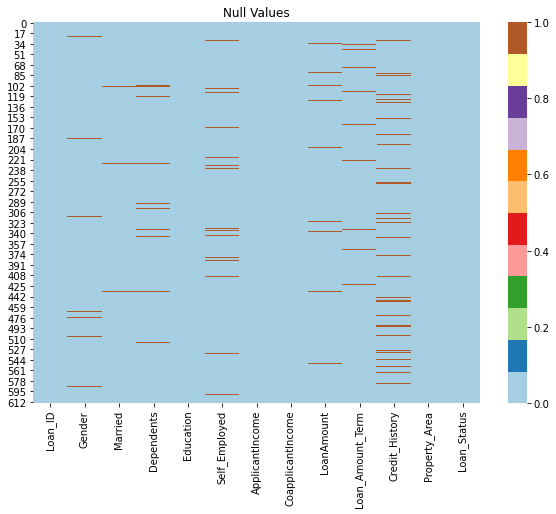

In [10]:
# Lets visualize null Values present in the dataset.
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

* Heatmap visualization also confirms presence of null values in the columns.

In [11]:
# Now lets check the unique values in all the columns of the dataset.
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

* Here we can see that all values  of column Loan_ID is unique as expected, but this will not help us in analysis.

In [12]:
# Checking value count of all the columns present in the dataset.
for i in df.columns:
    print(df[i].value_counts())
    print("_______________________________________________________")
    print("-------------------------------------------------------")

LP001356    1
LP002555    1
LP002917    1
LP001005    1
LP001594    1
           ..
LP002603    1
LP001949    1
LP001253    1
LP002367    1
LP002236    1
Name: Loan_ID, Length: 614, dtype: int64
_______________________________________________________
-------------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
_______________________________________________________
-------------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
_______________________________________________________
-------------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
_______________________________________________________
-------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
_______________________________________________________
-------------------------------------------------------

* Here we are confirmed once more that all values present in the loan ID column are Unique, which will not help in our analysis
* There is one more column named Coapplicant Income where there are 273 rows with 0.0 values, we have to fix that as well, else it will affect in our model performance.

In [13]:
# lets drop the loan id column first
df.drop(["Loan_ID"],axis=1,inplace=True)

In [14]:
# lets check statistical Summary if the dataset provided and trying to study and observe the data.
df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


Initial Observations:
    
    * Here we can clearly see that huge amount of outliers are present in ApplicantIncome,CoapplicantIncome, LoanAmount, Loan_Amount_Term.
    
    * There is skewness present in all the Numeric columns.
    
    * Standard Deviation is high in ApplicantIncome, coapplicantincom,loanAmount and Loan_Amount_Term
    

In [15]:
# Lets check the presence of skewness now
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Ideal skewness range is +/- 0.50. Here we can clearly see that skewness if present in all numerical columns 

Imputation Technique:
    It is used to Replace NaN values:
        there is skewness in all the numerical columns amd we have to use mean or median to replace NaN values. i am using mean to replace null values in coapplicant income column and median to replace null values in LoanAmount column.
        And i am using mode to replace nan values in all other columns including two numerical columns loan_amount_term and credit history as there are only 10 amd 2 unique values present in that column.

In [16]:
# lets replace zeros in coapplicantIncome column with mean
df["CoapplicantIncome"].replace(0,df["CoapplicantIncome"].mean(),inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


* Here we have successfully replaced null values in column CoapplicantIncome with mean of the column.

In [17]:
# Replacing NaN values in LoanAmount column with median
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [18]:
# replacing Nan Or Null values in all other categorical columns with mode of that column
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [19]:
# lets re-check null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* Successfully replaced all null or NaN values present in the dataset.

In [20]:
# Lets check if there is any empty observation present in the dataset
df.loc[df["Loan_Status"]== "  "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


* Here we can see that there are no empty observation present in any columns of this dataset.

# Visualization:

# UniVariate Analysis:

In [21]:
# Lets divide integer and categorical columns in two different variables
category=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        category.append(i)
    else:
        integer.append(i)
print(category)
print(integer)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


* Here we have successfully separated categorical and integer/float data.

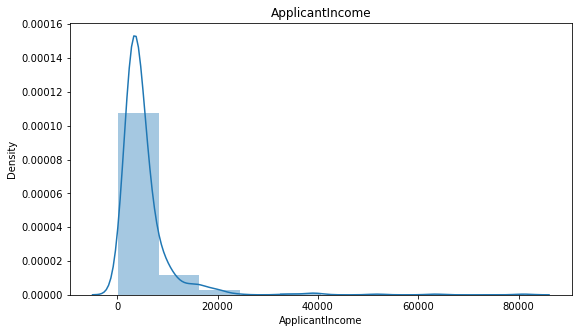

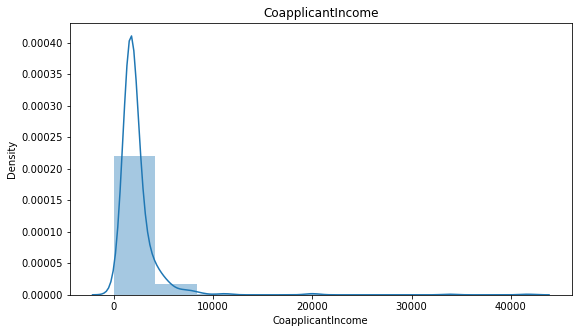

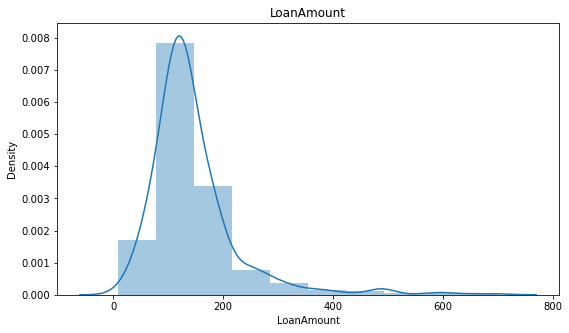

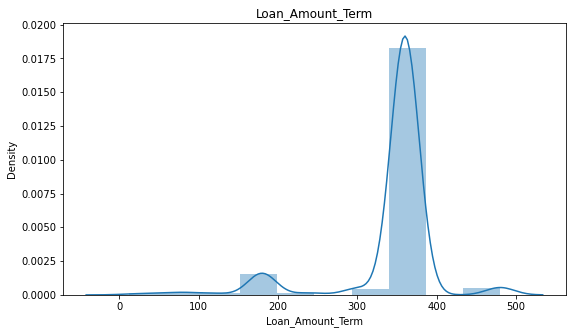

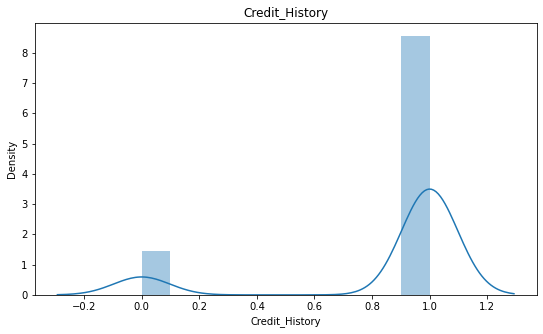

In [22]:
# Lets visualize all numerical columns using distribution plot.
for i in df[integer]:
    plt.figure(figsize=(9,5))
    sns.distplot(df[i], bins=10)
    plt.title(i)
    plt.show()

* Here also we can see that skewness is present in all the Numerical columns.

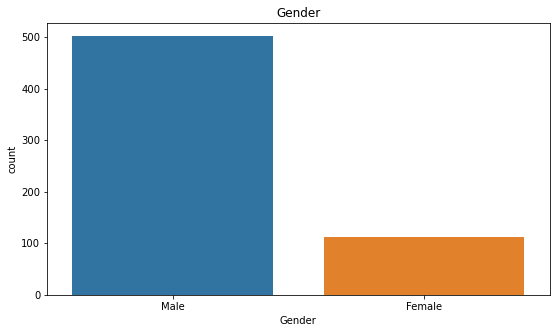

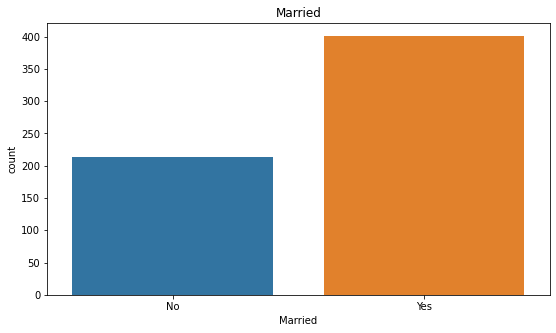

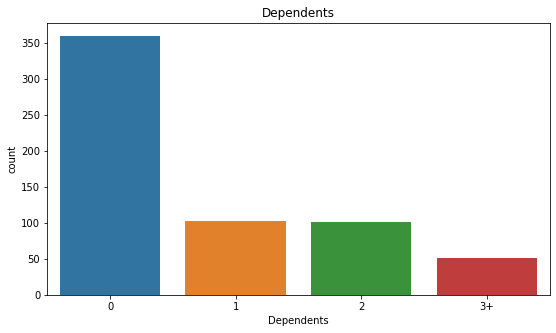

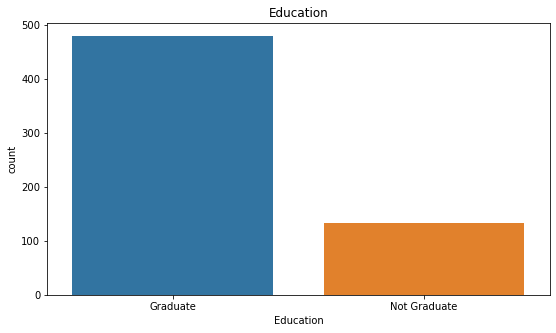

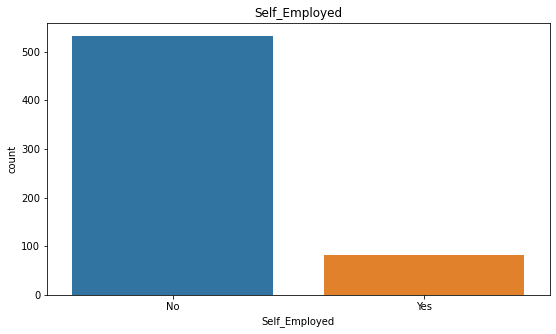

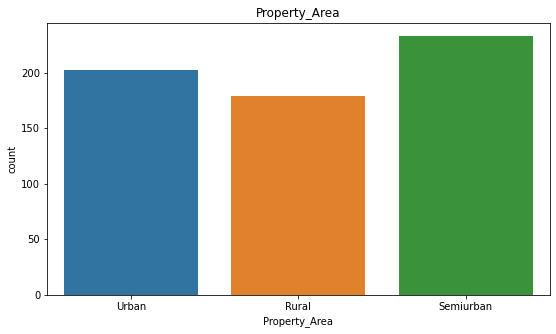

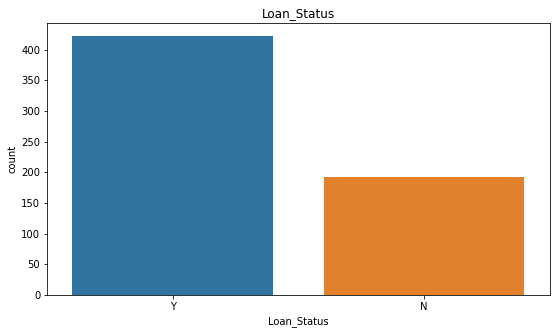

In [23]:
for i in df[category]:
    plt.figure(figsize=(9,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

Key Observations:
    
    * In Column gender we can clearly see that most of the applicants are Male.
    
    * In Column Married we can clearly see that most of the applicants are Married.
    
    * In Dependents column we can clearly see that most of the applicants have 0 dependents.
    
    * In Education column we can clearly see that most of the applicants are minimum Graduate.
    
    * In Self_Employed column we can clearly see that most of the applicants are salaried.
    
    * In Property_Area column we can clearly see that most of the properties are from semiurban than urban and least in Rural Area.
    
    * In Our Target column Loan_Status most of the applicants are elidgible for loan.

# BiVariate Analysis:
    Here we will find correlation in two columns.

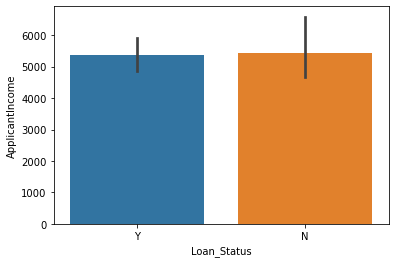

In [35]:
# checking correlation of our target column with ApplicantIncome
sns.barplot(x="Loan_Status",y="ApplicantIncome",data=df)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

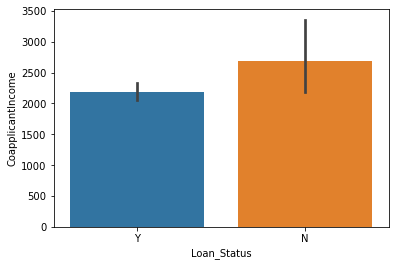

In [36]:
#checking correlation of our target column with CoapplicantIncome
sns.barplot(x="Loan_Status",y="CoapplicantIncome",data=df)

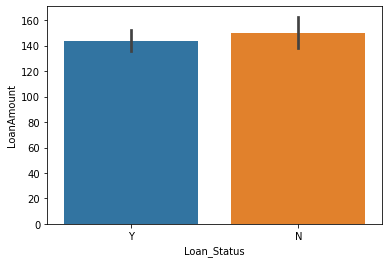

In [38]:
#checking correlation of our target column  with LoanAmount
sns.barplot(x="Loan_Status",y="LoanAmount",data=df)
plt.show()

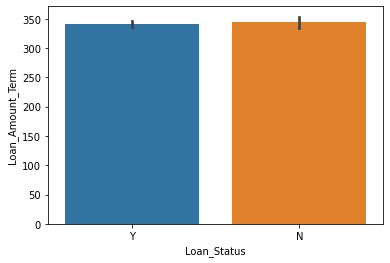

In [39]:
#checking correlation of our target column  with Loan_Amount_Term
sns.barplot(x="Loan_Status",y="Loan_Amount_Term",data=df)
plt.show()

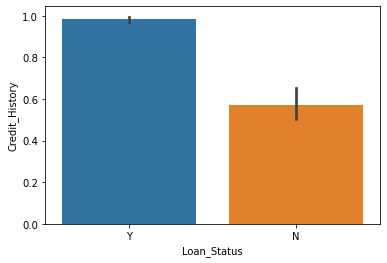

In [40]:
#checking correlation of our target column  with credit history
sns.barplot(x="Loan_Status",y="Credit_History",data=df)
plt.show()

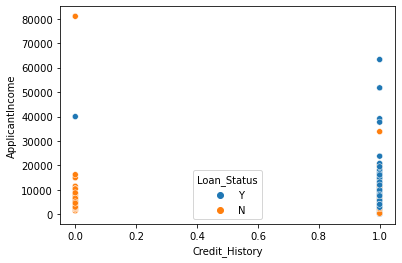

In [43]:
#checking correlation of our target column  with credit history
sns.scatterplot(x="Credit_History",y="ApplicantIncome",hue="Loan_Status",data=df)
plt.show()

* Here we can clearly see that if the applicant has good credit score the loan approval chances are more.

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

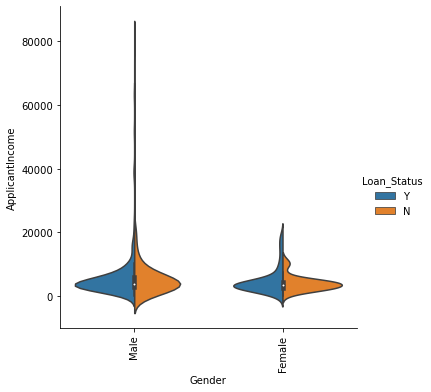

In [44]:
# lets correlate gender with applicantIncome with loan_status as hue
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90)

* Here we can see that male applicant has more chance of getting loan approved as compared to female.

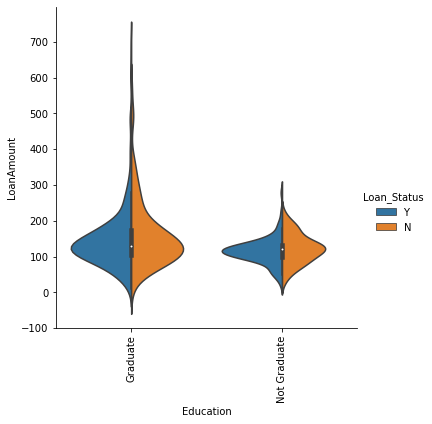

In [45]:
# lets compare education with loanAmount
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

* Graduate applicants have more chances of getting loans approved.

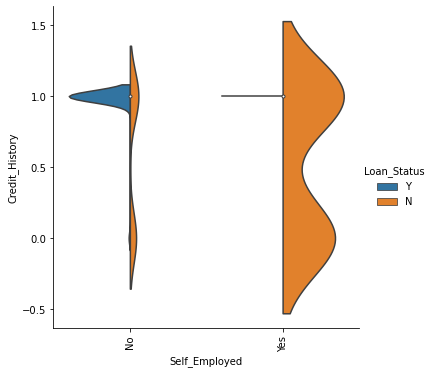

In [46]:
# Lets compare self employed with credit history
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

* Here we can clearly see that applicants who are self employed have very low chances of getting loan approved.

# Multivariate Analysis:
            
            * here we can correlate or compare 3 or more columns together.

In [50]:
# Lets see correlation between all the columns of the dataset
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.050734,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.050734,1.000000,0.206453,-0.073210,0.008339
LoanAmount,0.565181,0.206453,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.073210,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.008339,-0.000607,-0.004705,1.000000


* here we can see that there is good positive correlation between applicantIncome and LoanAmount

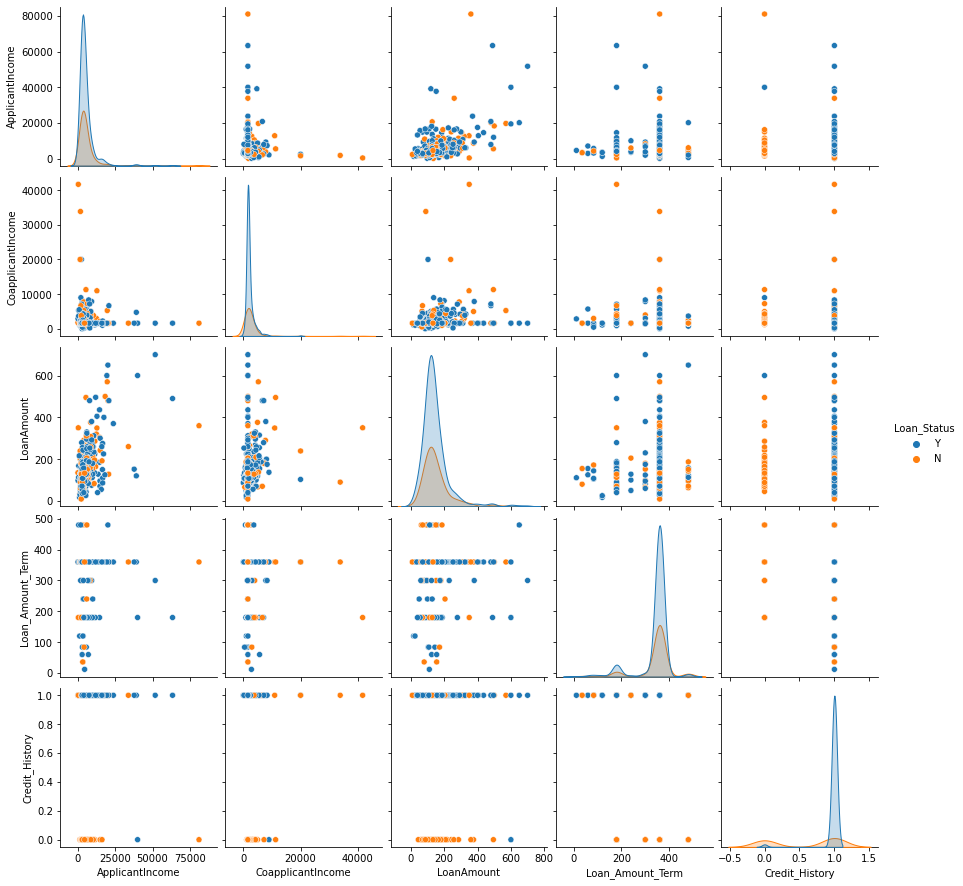

In [51]:
# lets correlate all the columns in dataset using pairplot
sns.pairplot(df,hue="Loan_Status")

# Data Cleaning:

# Outliers:

<AxesSubplot:>

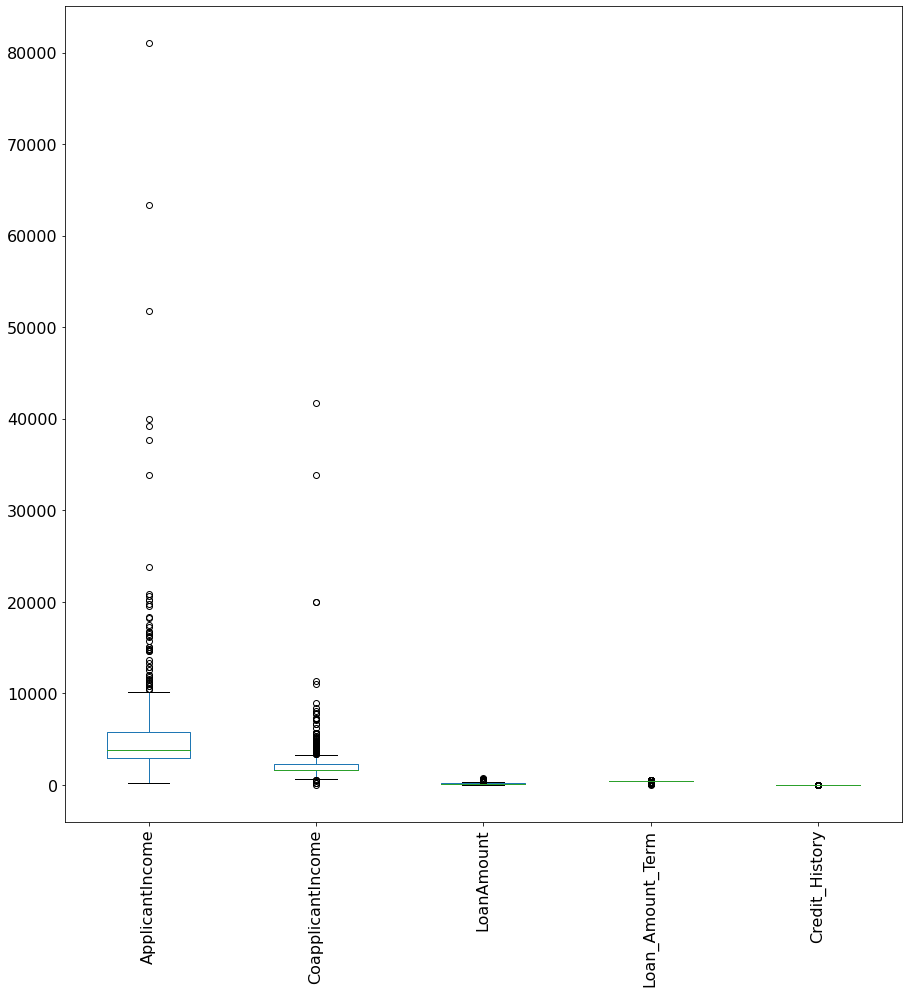

In [52]:
# Checking outliers using boxplot
df.plot(kind="box", figsize=(15,15),fontsize=16, rot=90)

* There are high value of outliers present in ApplicantIncome and CoapplicantIncome and few outliers are present in other 3 columns.
loan_amount_term and credit_history are categorical columns. so we wont remove there outliers.

# Removing Outliers using Zscore Method:

In [53]:
out=df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

* we have created a list of columns to remove outliers from these columns

In [54]:
# importing required library for zscore
from scipy.stats import zscore
z=np.abs(zscore(out))
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


* We have successfully removed outliers from the dataset

In [55]:
# checking the shape of new dataset
df1.shape

(589, 12)

* we have got 589 rows in 12 columns

In [56]:
# Checking the Percentage of dataloss using zscore
dataloss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
dataloss

4.071661237785016

* We have just lost 4.07% of data which is quite good.

# Skewness:

In [57]:
# Lets check skewness in new dataset
df1.skew()

ApplicantIncome      2.164762
CoapplicantIncome    2.554282
LoanAmount           1.114173
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

* we can see presence of skewness in all the columns as ideal skewness limit is considered as +/-0.50.

# Removing skewness using yeo-johnson method:

In [58]:
# lets remove skewness from 3 columns only as Loan_amount_term(10 unique values) and credit_history(2 unique values) are like categorical columns
# Lets import required library
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method="yeo-johnson")
'''
parameters:
method='box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box_cox' or 'yeo-johnson'\n"

In [65]:
skew=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [66]:
df1[skew]=scaler.fit_transform(df1[skew].values)

In [67]:
df1[skew].skew()

ApplicantIncome      0.028063
CoapplicantIncome    0.202442
LoanAmount           0.061412
dtype: float64

* Now we can see that we have successfully removed the skewness from all three columns.

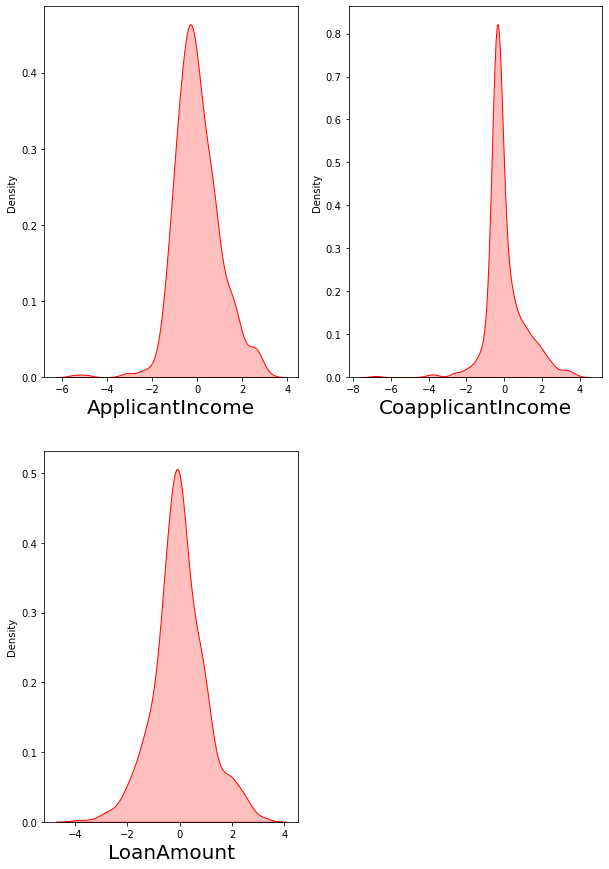

In [76]:
# lets visualize the distribution of data in each column using distribution plot


plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df1[skew]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df1[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* It seems very close to perfect curve

# Label Encoding:

In [77]:
# lets separate category columns in new dataset
category1=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        category1.append(i)
print(category1)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [78]:
# importing required library
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1[category1]=df1[category1].apply(le.fit_transform)
df1[category1].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


* We have successfully converted object datatype columns to integer datatype columns

In [79]:
# Lets check the correlation in all the columns present in this database
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.058502,0.091815,0.157432,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.022535,0.046542,0.173073,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105559,-0.092968,0.128368,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.168924,-0.093711,-0.133962,-0.076546,-0.073799,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.215911,0.010388,0.105322,-0.053868,-0.012954,-0.030248,-0.016617
ApplicantIncome,0.058502,-0.022535,0.105559,-0.168924,0.215911,1.000000,-0.090870,0.436309,-0.041597,0.026989,-0.016277,-0.003320
CoapplicantIncome,0.091815,0.046542,-0.092968,-0.093711,0.010388,-0.090870,1.000000,0.311612,-0.048582,-0.041050,-0.079278,-0.026858
LoanAmount,0.157432,0.173073,0.128368,-0.133962,0.105322,0.436309,0.311612,1.000000,0.094441,-0.008701,-0.102290,-0.034886
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.053868,-0.041597,-0.048582,0.094441,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,-0.012954,0.026989,-0.041050,-0.008701,-0.013960,1.000000,-0.005694,0.555908


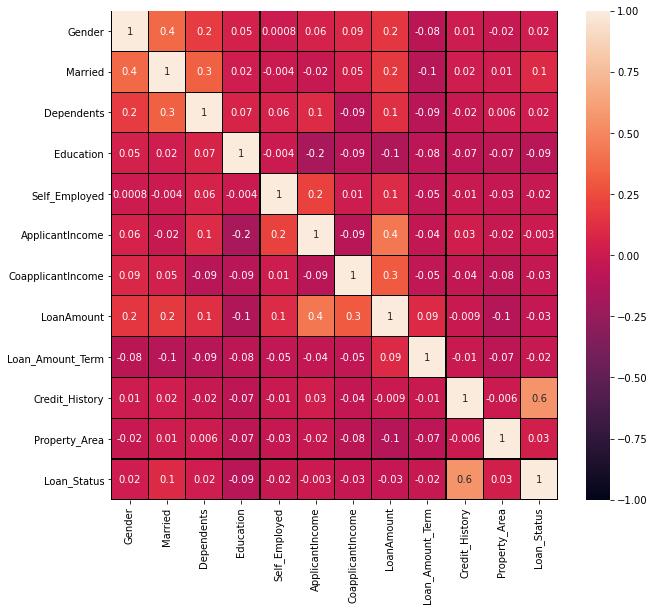

In [80]:
# Lets visualize correlation in all the columns using heatmap
plt.figure(figsize=(10,9))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10})
plt.yticks(rotation=0);

* Multicolinearity issue is not there in this dataset.
* we can clearly see that target column loan_status have very strong correlation with Credit_history

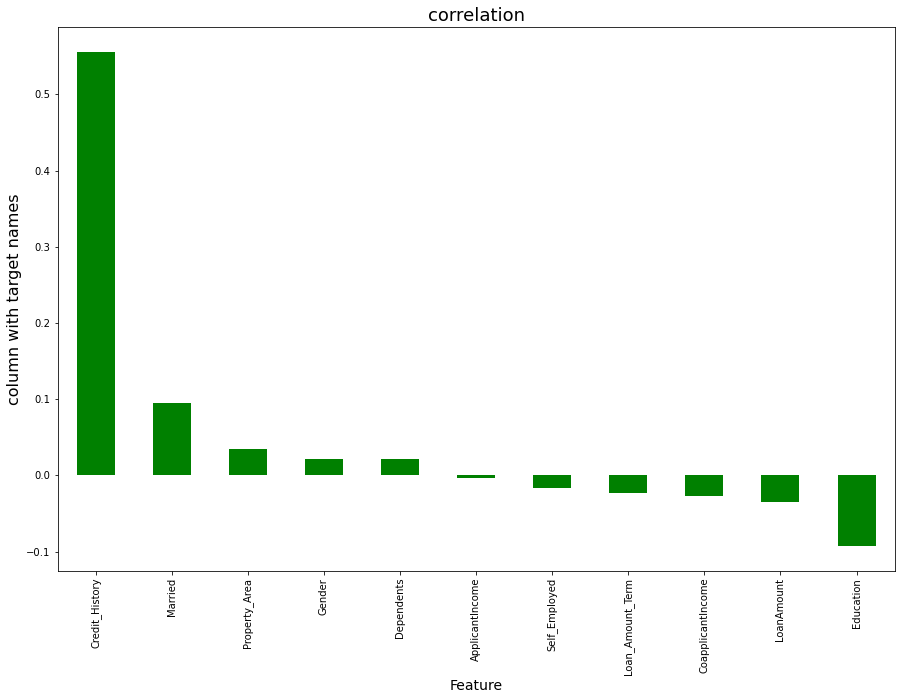

In [81]:
plt.figure(figsize=(15,10))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=18)
plt.show()

* Here we can clearly see that ApplicantIncome and CoapplicantIncome is negatively correlated to our target column loan_status.

# Scaling:

In [83]:
# lets assing features to x and target variable to y
x1=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

* We have successfully assigned values to x and y

# Standard Scaler:

In [84]:
# importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

* I have successfully scaled the data in this dataset using StandardScaler.

In [85]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.688986,-0.374510,0.003682,0.272306,0.41349,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.384900,0.239843,-0.522855,0.003682,0.272306,0.41349,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.598076,-0.525799,-0.374510,-1.384802,0.272306,0.41349,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.384900,-0.791841,0.424361,-0.148052,0.272306,0.41349,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.736280,-0.374510,0.238407,0.272306,0.41349,1.222929


# OverSampling:

In [86]:
# here we are balancing the target variable using oversampling method
# lets check the value_counts in y
y.value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

In [87]:
# Importing required library for oversampling
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [88]:
# lets check the value count again
y.value_counts()

0    407
1    407
Name: Loan_Status, dtype: int64

* here we have successfully balanced the target variable

# Best Random State:

In [89]:
# lets find best random state and accuracy score
# importing all required libraries
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [91]:
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best accuracy is ",max_acc," on Random_state ",max_rs)

Best accuracy is  0.8816326530612245  on Random_state  183


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=183)

# Classification Algorithm:
        
        since our target column loan_status is an object column this became classification problem

In [94]:
# Importing all necessary libraries for our models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB

# 1) K-Neighbor Classifier:

In [95]:
knn=KNN()
knn.fit(x_train,y_train)
predk=knn.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predk))
print("Confusion Matrix: ", confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))

R2_Score:  0.7818181818181819
Confusion Matrix:  [[88 14]
 [34 84]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       102
           1       0.86      0.71      0.78       118

    accuracy                           0.78       220
   macro avg       0.79      0.79      0.78       220
weighted avg       0.79      0.78      0.78       220



* here we have got accuracy score of 78.18 %.

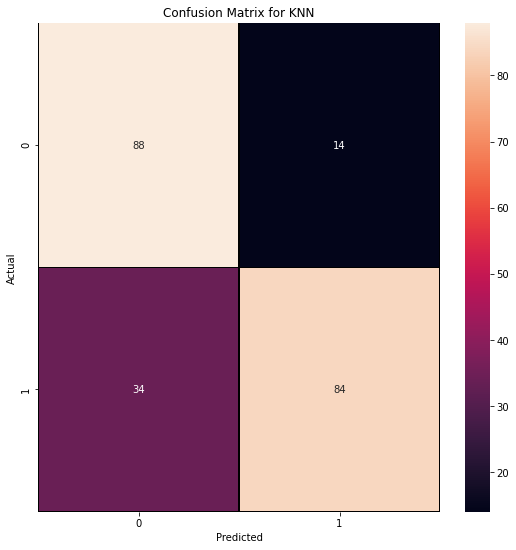

In [97]:
cm= confusion_matrix(y_test,predk)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()

* Here we can see the predicted and actual values in KNN model using confusion matrix

# 2) SupportVectorClassifier:

In [98]:
sv=SVC()
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predsv))
print("Confusion Matrix: ", confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

R2_Score:  0.7909090909090909
Confusion Matrix:  [[ 70  32]
 [ 14 104]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       102
           1       0.76      0.88      0.82       118

    accuracy                           0.79       220
   macro avg       0.80      0.78      0.79       220
weighted avg       0.80      0.79      0.79       220



* Here we are getting r2 score of 79% using SVC.

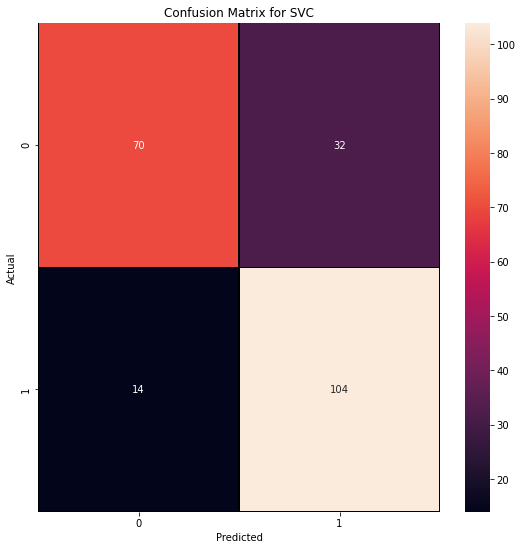

In [99]:
cm= confusion_matrix(y_test,predsv)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVC")
plt.show()

Here we can see the predicted and actual values in SVC model using confusion matrix

# 3)GradientBoostingClassifier:

In [100]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predgbc))
print("Confusion Matrix: ", confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

R2_Score:  0.85
Confusion Matrix:  [[ 81  21]
 [ 12 106]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       102
           1       0.83      0.90      0.87       118

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



* Here we have got best score till now 85% using Gradientboostingclassifier

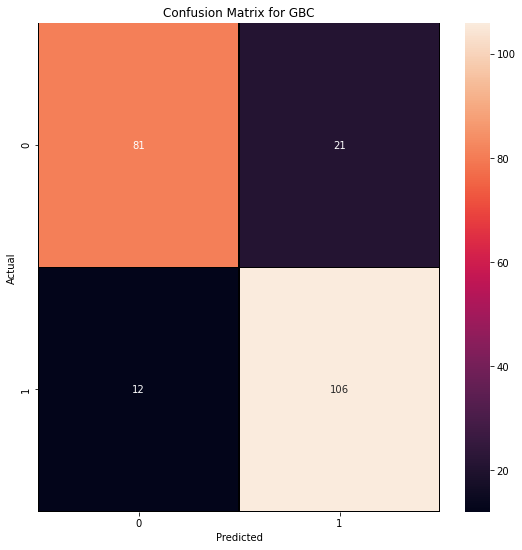

In [101]:
cm= confusion_matrix(y_test,predgbc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GBC")
plt.show()

* Here we can see the predicted and actual values in GBC model using confusion matrix

# 4) DecisionTreeClassifier:

In [102]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,preddtc))
print("Confusion Matrix: ", confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

R2_Score:  0.8272727272727273
Confusion Matrix:  [[88 14]
 [24 94]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       102
           1       0.87      0.80      0.83       118

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



* Using Decision Tree Classifier we have got score of 82.72% which is fine.

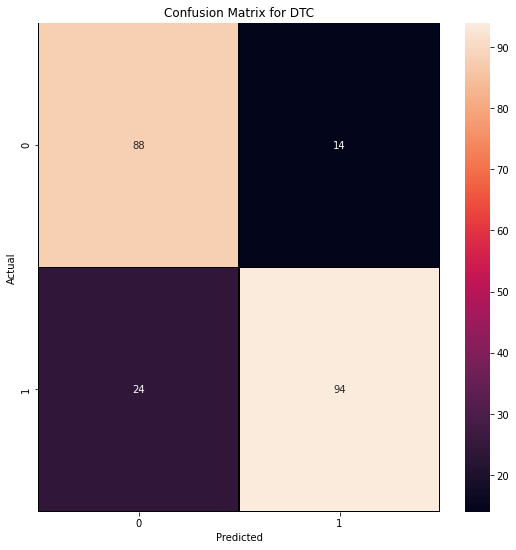

In [103]:
cm= confusion_matrix(y_test,preddtc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for DTC")
plt.show()

* Here we can see the predicted and actual values in DTC model using confusion matrix

# 5) Random Forest Classifier:

In [104]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predrfc))
print("Confusion Matrix: ", confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

R2_Score:  0.8818181818181818
Confusion Matrix:  [[ 86  16]
 [ 10 108]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       102
           1       0.87      0.92      0.89       118

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



* here using Random Forest Classifier we have got best accuracy score of 88.18%. which is very good.

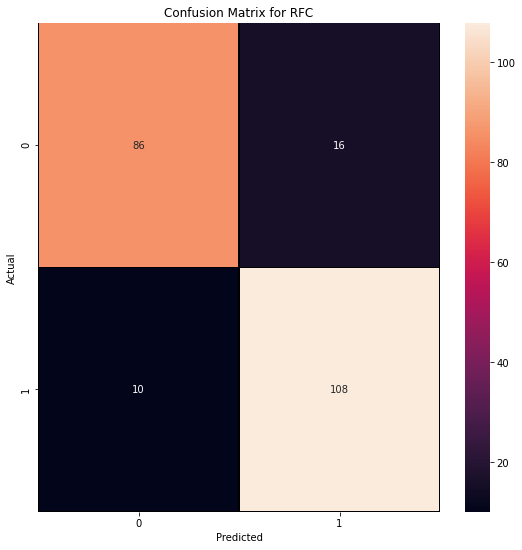

In [105]:
cm= confusion_matrix(y_test,predrfc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RFC")
plt.show()

* Here we can see the predicted and actual values in DTC model using confusion matrix

# Cross Validation Score:

In [106]:
# Importing Required library for cross validation
from sklearn.model_selection import cross_val_score

In [107]:
# Cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7531470120427176


In [108]:
# Cv score of SVC
print(cross_val_score(sv,x,y,cv=5).mean())

0.7445126107702794


In [109]:
# Cv score of GBC
print(cross_val_score(gbc,x,y,cv=5).mean())

0.790009846247065


In [110]:
# Cv score of DTC
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7728016359918202


In [111]:
# Cv score of RFC
print(cross_val_score(rfc,x,y,cv=5).mean())

0.836688631371658


* we can see cross validation scores of all the classification models here also best score is of Random forest Classifier.

# * After looking both the scores(accuracy score, cross validation score) we found Random Forest Classifier with least difference in score and that's why we are selecting RandomForestTree as our final model and tuning it using Hyper Parameter.

# Hyper Parameter Tuning:

In [112]:
# importing all required libraries
from sklearn.model_selection import GridSearchCV

In [113]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [114]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [116]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [117]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 300}

In [118]:
final_model=RandomForestClassifier(criterion="entropy", max_depth=15 , max_features="auto" ,n_estimators=300)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

88.18181818181819


* After tuning the model we have got accuracy score of 88.18% which is quite good.

# ROC-AUC Curve:

In [119]:
# we will be plotting all the models used here together
# importing required libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

<function matplotlib.pyplot.show(close=None, block=None)>

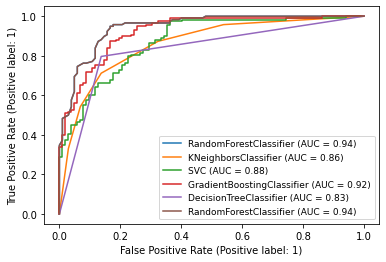

In [121]:
dis=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)
plot_roc_curve(sv,x_test,y_test, ax=dis.ax_)
plot_roc_curve(gbc,x_test,y_test, ax=dis.ax_)
plot_roc_curve(dtc,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rfc,x_test,y_test, ax=dis.ax_)

plt.legend(prop={"size":9}, loc="lower right")
plt.show

* Here we have predicted ROC curves for all the models with AUC values also present in the plot.

# Model Saving:

In [122]:
# saving the model in pkl file
# importing required library for that
import joblib
joblib.dump(final_model,"LoanASPrediction.pkl")

['LoanASPrediction.pkl']

# Loading file and predictions:

In [123]:
# loading saved pkl file
model=joblib.load("LoanASPrediction.pkl")

# predictions
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [124]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
Predicted,1,0,0,1,1,0,0,1,1,1,...,0,1,0,1,1,0,0,1,1,0
Actual,1,0,0,1,1,0,0,1,1,0,...,1,1,0,0,0,0,0,1,1,0


In [ ]:
* Here we can see that most of the predicted values are accurate and Actual values.